# BARCELONA AIRBNB PRICE PREDICTION 

#### Importing libraries and loading dataset

In [1]:
### Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
### Loading the dataset
df= pd.read_csv("C:/Users/ADMIN/Downloads/barcelona_weekends.csv")
df.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,532.036214,Entire home/apt,False,False,4.0,False,0,1,10.0,91.0,1,1.111998,0.630504,526.471472,20.327672,915.591455,20.112468,2.17556,41.39624
1,1,169.897829,Private room,False,True,2.0,True,1,0,10.0,88.0,1,1.751831,0.124013,320.128264,12.360522,794.279660,17.447656,2.14906,41.38714
2,2,196.895292,Private room,False,True,2.0,False,1,0,9.0,90.0,1,0.621731,0.297516,503.354025,19.435081,1242.434221,27.292106,2.16500,41.38300
3,3,141.271208,Private room,False,True,3.0,False,0,1,9.0,86.0,1,1.648311,0.089442,342.595820,13.228021,820.921958,18.032897,2.15342,41.37912
4,4,715.200037,Entire home/apt,False,False,4.0,True,0,1,9.0,95.0,2,0.693560,0.357653,537.803135,20.765201,1081.560116,23.758242,2.17498,41.39214


In [3]:
df.shape

(1278, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1278 non-null   int64  
 1   realSum                     1278 non-null   float64
 2   room_type                   1278 non-null   object 
 3   room_shared                 1278 non-null   bool   
 4   room_private                1278 non-null   bool   
 5   person_capacity             1278 non-null   float64
 6   host_is_superhost           1278 non-null   bool   
 7   multi                       1278 non-null   int64  
 8   biz                         1278 non-null   int64  
 9   cleanliness_rating          1278 non-null   float64
 10  guest_satisfaction_overall  1278 non-null   float64
 11  bedrooms                    1278 non-null   int64  
 12  dist                        1278 non-null   float64
 13  metro_dist                  1278 

In [5]:
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

### 1. Linear Regression 

In [6]:
### Importing library
from sklearn.linear_model import LinearRegression

In [7]:
### Let my features for the prediction be:
features = df[['person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']]
### And the target be:
target = df['realSum']

In [8]:
### Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [9]:
### Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
### Predict prices on the test set
y_pred = model.predict(X_test)

### Calculating mean squared error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)

167290.96989058988


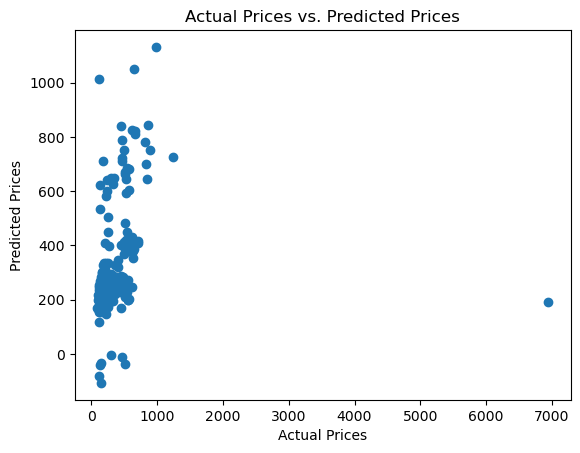

In [11]:
# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### 2. Random Forest

In [12]:
### Importing library
from sklearn.ensemble import RandomForestRegressor

In [13]:
### Let my features for the prediction be:
features = df[['person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']]
### And the target be:
target = df['realSum']

In [14]:
### Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [15]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Predict prices on the test set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(mse)

173445.84973571228


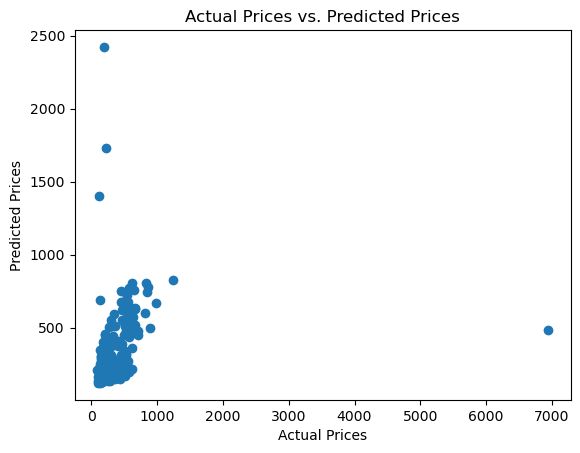

In [17]:
# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()